In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Mall_Customers.csv")

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [7]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 7
Number of noise points: 35


In [8]:
if n_clusters > 1:
    score = metrics.silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.32


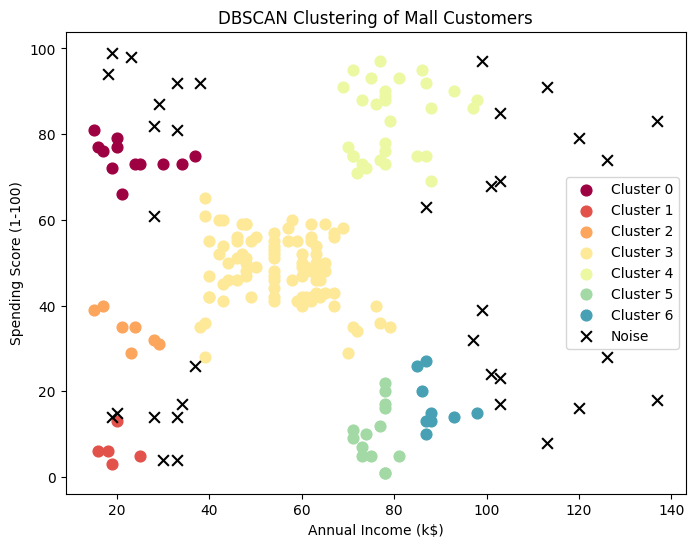

In [9]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    if k == -1:
        # Black for noise.
        col = [0, 0, 0, 1]
        plt.scatter(xy[:, 0], xy[:, 1], c=[tuple(col)], marker='x', s=60, label='Noise')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[tuple(col)], marker='o', s=60, label=f'Cluster {k}')
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
